In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import linecache
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
hwPower_init = pd.read_csv("/home/htran197/accel-sim-framework/util/accelwattch/accelwattch_hw_profiler/hw_power_validation_pascal.csv")
hwPower_init = hwPower_init.drop(['st_dev', 'var', '#samples'], axis=1)

for i, row in hwPower_init.iterrows():
    hwPower_init.at[i,'benchmark'] =  hwPower_init.at[i,'benchmark'][0:-3]

print(hwPower_init)


               benchmark  mean HW_power
0               backprop       56.70192
1               backprop       45.25252
2        binomialOptions       44.95794
3                  btree       44.29484
4                  btree       41.51840
5                 dct8x8       42.46558
6                 dct8x8       53.24054
7     fastWalshTransform       41.55978
8     fastWalshTransform       52.56158
9              histogram       55.74590
10               hotspot       42.15578
11                kmeans       45.90302
12             mergeSort       54.79382
13             mergeSort       46.63000
14          parboil_mriq       57.36638
15           parboil_sad       44.78802
16         parboil_sgemm       65.41236
17            pathfinder       53.63542
18  quasirandomGenerator       63.43850
19  quasirandomGenerator       66.09790
20             sobolQRNG       54.29438
21               srad_v1       57.86464


In [8]:
hwPowerCol = {'benchmark', 'kernel 1 power', 'kernel 2 power'}
hwPower = pd.DataFrame(columns=hwPowerCol)

track = 0
for i, row in hwPower_init.iterrows():
    if i == 0:
        hwPower = hwPower.append({'benchmark': hwPower_init.at[i,'benchmark'], 'kernel 1 power': hwPower_init.at[i,'mean HW_power'], 'kernel 2 power': 0.0}, ignore_index=True)
        continue
    if hwPower_init.at[i,'benchmark'] == hwPower_init.at[i-1,'benchmark']:
        hwPower.at[track,'kernel 2 power'] = hwPower_init.at[i,'mean HW_power']
    else:
        hwPower = hwPower.append({'benchmark': hwPower_init.at[i,'benchmark'], 'kernel 1 power': hwPower_init.at[i,'mean HW_power'], 'kernel 2 power': 0.0}, ignore_index=True)
        track +=1

for i, row in hwPower_init.iterrows():
    if hwPower_init.at[i,'benchmark'] == 'backprop':
        hwPower_init.at[i,'benchmark'] = 'backprop-rodinia-3.1'
    
    if hwPower_init.at[i,'benchmark'] == 'binomialOptions':
        hwPower_init.at[i,'benchmark'] = 'binomialOptions'
    
    if hwPower_init.at[i,'benchmark'] == 'btree':
        hwPower_init.at[i,'benchmark'] = 'b+tree-rodinia-3.1'
    
    if hwPower_init.at[i,'benchmark'] == 'dct8x8':
        hwPower_init.at[i,'benchmark'] = 'dct8x8'
    
    if hwPower_init.at[i,'benchmark'] == 'fastWalshTransform':
        hwPower_init.at[i,'benchmark'] = 'fastWalshTransform'
    
    if hwPower_init.at[i,'benchmark'] == 'histogram':
        hwPower_init.at[i,'benchmark'] = 'histogram'
    
    if hwPower_init.at[i,'benchmark'] == 'hotspot':
        hwPower_init.at[i,'benchmark'] = 'hotspot-rodinia-3.1'
    
    if hwPower_init.at[i,'benchmark'] == 'kmeans':
        hwPower_init.at[i,'benchmark'] = 'kmeans-rodinia-3.1'
    
    if hwPower_init.at[i,'benchmark'] == 'mergeSort':
        hwPower_init.at[i,'benchmark'] = 'mergeSort'
    
    if hwPower_init.at[i,'benchmark'] == 'parboil_mriq':
        hwPower_init.at[i,'benchmark'] = 'parboil-mri-q'
    
    if hwPower_init.at[i,'benchmark'] == 'parboil_sad':
        hwPower_init.at[i,'benchmark'] = 'parboil-sad'
    
    if hwPower_init.at[i,'benchmark'] == 'parboil_sgemm':
        hwPower_init.at[i,'benchmark'] = 'parboil-sgemm'
    
    if hwPower_init.at[i,'benchmark'] == 'pathfinder':
        hwPower_init.at[i,'benchmark'] = 'pathfinder-rodinia-3.1'
    
    if hwPower_init.at[i,'benchmark'] == 'quasirandomGenerator':
        hwPower_init.at[i,'benchmark'] = 'quasirandomGenerator'
    
    if hwPower_init.at[i,'benchmark'] == 'sobolQRNG':
        hwPower_init.at[i,'benchmark'] = 'sobolQRNG'
    
    if hwPower_init.at[i,'benchmark'] == 'srad_v1':
        hwPower_init.at[i,'benchmark'] = 'srad_v1-rodinia-3.1'

print("Hardware")        
print(hwPower)

Hardware
   kernel 1 power               benchmark kernel 2 power
0        56.70192    backprop-rodinia-3.1       45.25252
1        44.95794         binomialOptions            0.0
2        44.29484      b+tree-rodinia-3.1        41.5184
3        42.46558                  dct8x8       53.24054
4        41.55978      fastWalshTransform       52.56158
5         55.7459               histogram            0.0
6        42.15578     hotspot-rodinia-3.1            0.0
7        45.90302      kmeans-rodinia-3.1            0.0
8        54.79382               mergeSort          46.63
9        57.36638           parboil-mri-q            0.0
10       44.78802             parboil-sad            0.0
11       65.41236           parboil-sgemm            0.0
12       53.63542  pathfinder-rodinia-3.1            0.0
13        63.4385    quasirandomGenerator        66.0979
14       54.29438               sobolQRNG            0.0
15       57.86464     srad_v1-rodinia-3.1            0.0


In [9]:
ptxDir = '/home/htran197/accel-sim-framework/accelwattch_power_reports/pascal_ptx_sim'
ptxCol = {'benchmark', 'kernel 1 power', 'kernel 2 power'}
ptxPower = pd.DataFrame(columns=ptxCol)
for filename in os.listdir(ptxDir):
    f = os.path.join(ptxDir, filename)

    line5 = linecache.getline(f, 5)
    line299 = linecache.getline(f, 299)
    
    for t in line5.split():
        try:
            line5Power = float(t)
        except ValueError:
            pass
    for t in line299.split():
        try:
            line299Power = float(t)
        except ValueError:
            pass
    
    ptxPower = ptxPower.append({'benchmark': filename[0:-4], 'kernel 1 power': line5Power, 'kernel 2 power': line299Power}, ignore_index=True)

print("PTX")
print(ptxPower)

PTX
   kernel 1 power             benchmark kernel 2 power
0         37.0237         parboil-mri-q        83.8025
1         83.8674  backprop-rodinia-3.1        82.5067
2         83.8674    kmeans-rodinia-3.1        82.5067
3         90.6211    fastWalshTransform        91.1011
4         90.6211           parboil-sad        91.1011
5         83.5167  quasirandomGenerator        83.8654
6         83.1467             sobolQRNG        83.8654
7         83.1467             mergeSort        83.8654
8         83.1467         parboil-sgemm        83.8654
9         74.6558   srad_v1-rodinia-3.1        71.4038
10        72.7933    b+tree-rodinia-3.1        71.5451
11        72.7933       binomialOptions        71.5451
12        72.7933                dct8x8        71.5451
13        75.8586             histogram        67.3174


In [10]:
sassDir = '/home/htran197/accel-sim-framework/accelwattch_power_reports/pascal_sass_sim'
sassCol = {'benchmark','kernel 1 power','kernel 2 power'}
sassPower = pd.DataFrame(columns=sassCol)
for filename in os.listdir(sassDir):
    f = os.path.join(sassDir, filename)

    line5 = linecache.getline(f, 5)
    line299 = linecache.getline(f, 299)
    
    for t in line5.split():
        try:
            line5Power = float(t)
        except ValueError:
            pass
    for t in line299.split():
        try:
            line299Power = float(t)
        except ValueError:
            pass
    
    sassPower = sassPower.append({'benchmark': filename[0:-4], 'kernel 1 power': line5Power, 'kernel 2 power': line299Power}, ignore_index=True)

print("SASS")
print(sassPower)

SASS
   kernel 1 power               benchmark kernel 2 power
0         36.9638           parboil-mri-q        67.3174
1         77.7557    backprop-rodinia-3.1        80.6264
2         71.5768      kmeans-rodinia-3.1        80.6264
3         89.8069      fastWalshTransform        90.1569
4         89.8069             parboil-sad        90.1569
5         89.8069    quasirandomGenerator        90.1569
6         77.4958  pathfinder-rodinia-3.1        77.6445
7         87.2023               sobolQRNG        77.6445
8         87.2023               mergeSort        77.6445
9         85.7725           parboil-sgemm        77.6445
10        85.7725     srad_v1-rodinia-3.1        77.6445
11        74.1722      b+tree-rodinia-3.1        73.0814
12        74.1722         binomialOptions        73.0814
13        74.1722                  dct8x8        73.0814
14        82.8825     hotspot-rodinia-3.1        73.0814
15        82.8825               histogram        73.0814


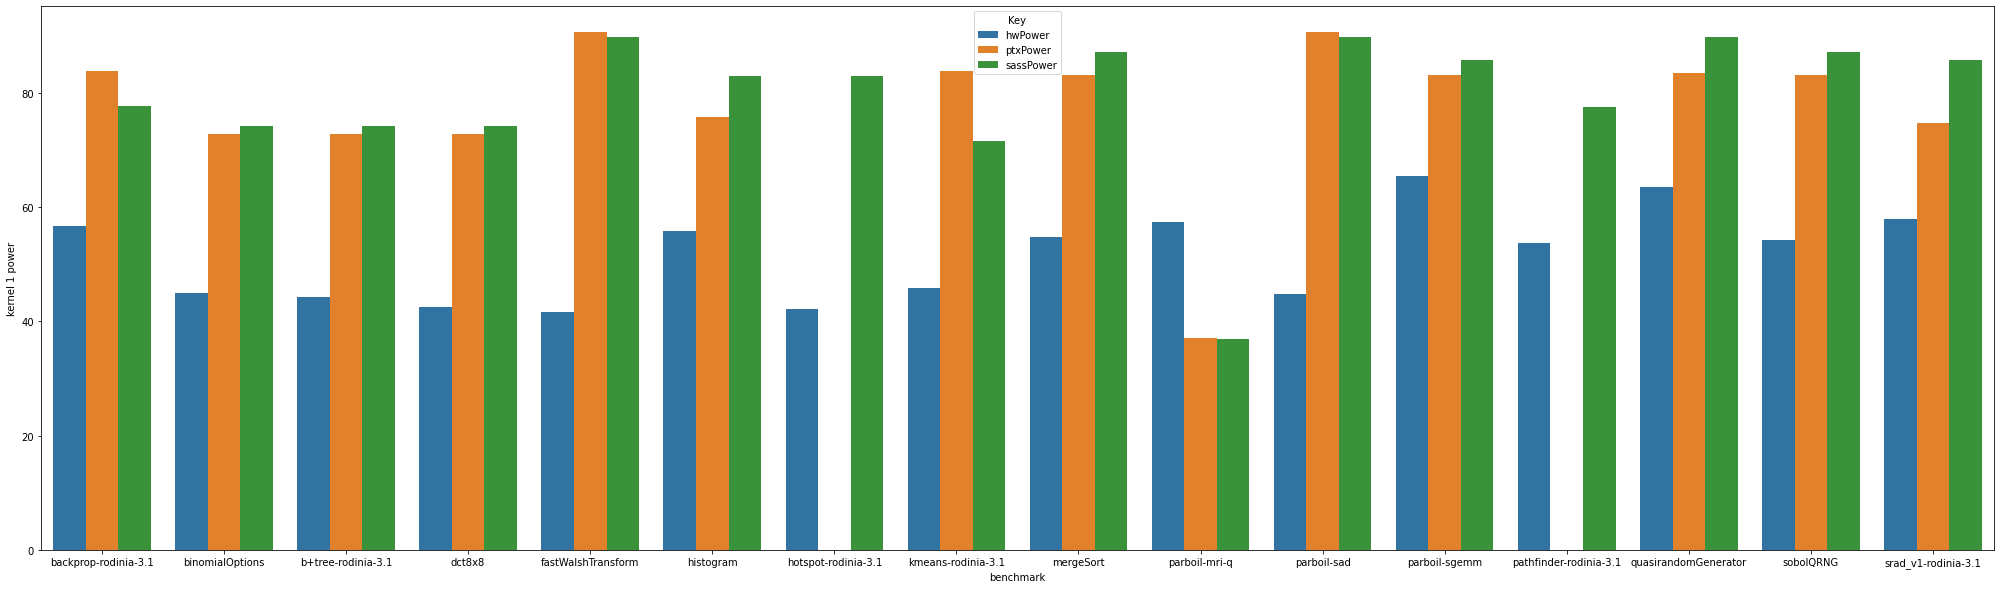

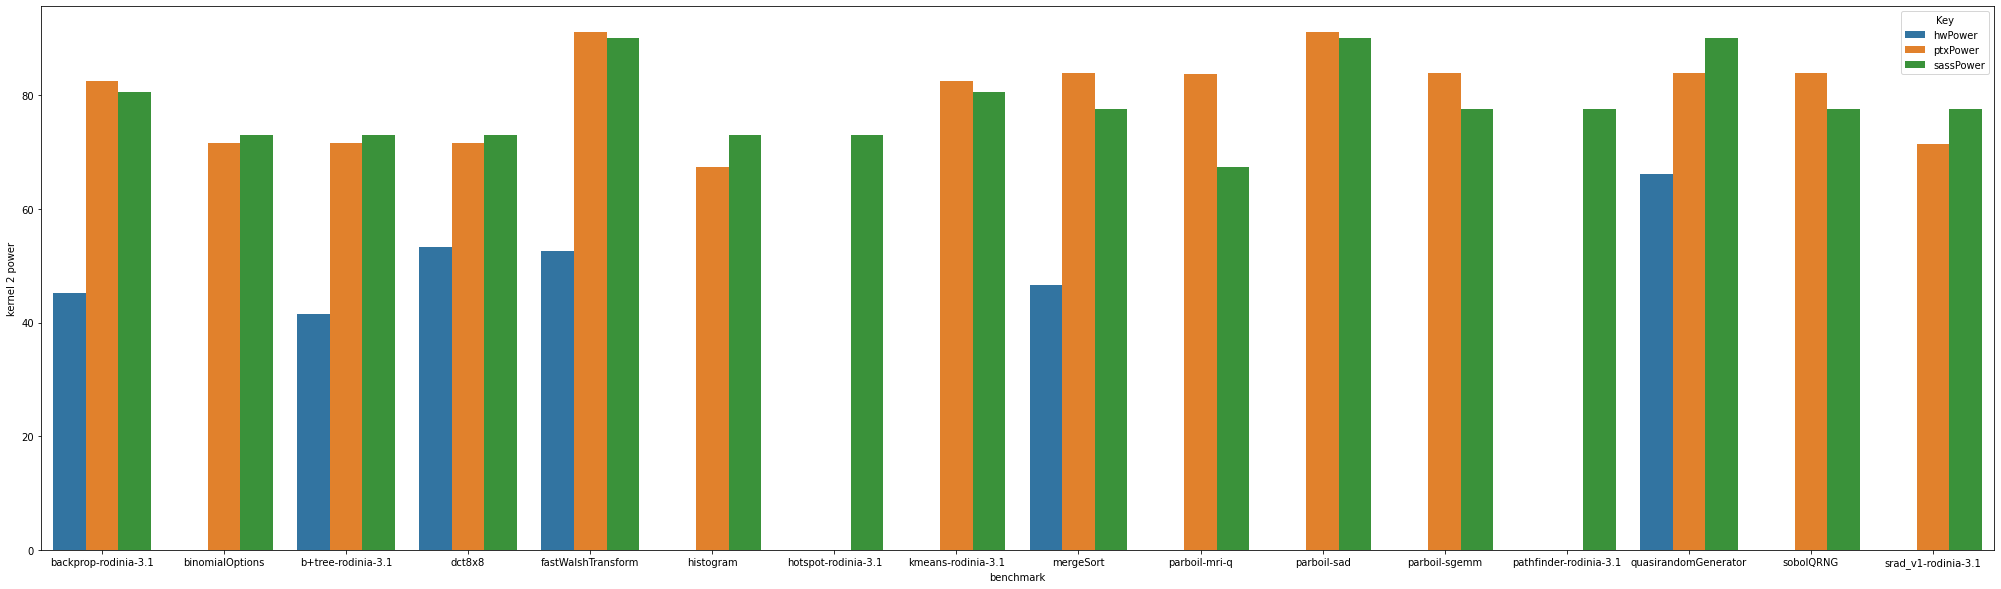

In [11]:
hwPower['Key']    = 'hwPower'
ptxPower['Key']   = 'ptxPower'
sassPower['Key']  = 'sassPower'

DF = pd.concat([hwPower,ptxPower, sassPower],keys=['hwPower','ptxPower','sassPower'])

fig1 = plt.subplots(figsize=(35, 10))
sns.barplot(data=DF, x="benchmark", y="kernel 1 power", hue='Key')
plt.savefig('k1_power.png', facecolor='w')


fig2 = plt.subplots(figsize=(35, 10))
sns.barplot(data=DF, x="benchmark", y="kernel 2 power", hue='Key')
plt.savefig('k2_power.png', facecolor='w')

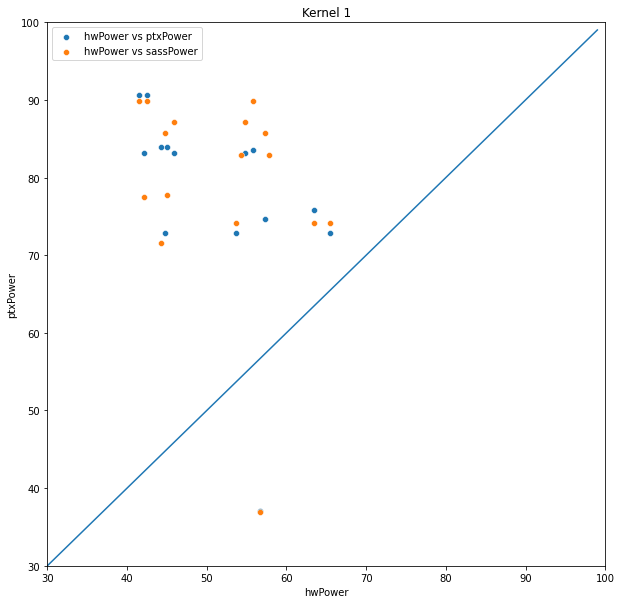

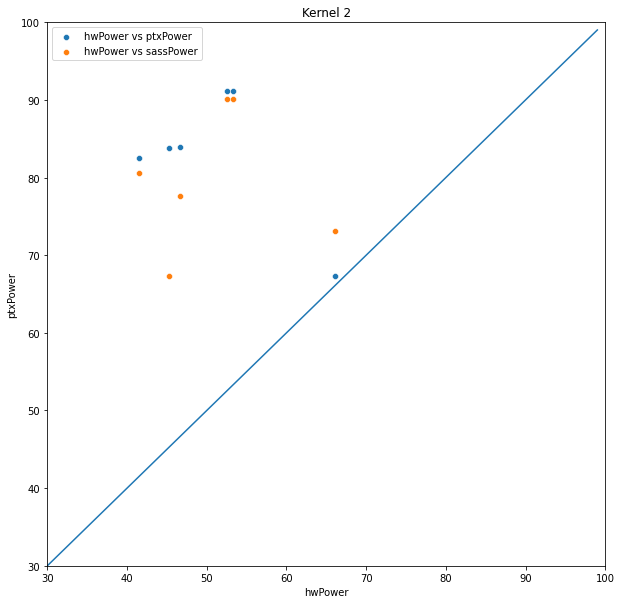

In [25]:
scatDFCol = {'benchmark', 'hwPower', 'ptxPower', 'sassPower'}
scatDFk1 = pd.DataFrame(columns=scatDFCol)
scatDFk1['benchmark'] = hwPower['benchmark']
scatDFk1['hwPower'] = hwPower['kernel 1 power']
scatDFk1['ptxPower'] = ptxPower['kernel 1 power']
scatDFk1['sassPower'] = sassPower['kernel 1 power']
x = list(range(0,100,1))
y = [i for i in x]
my_data = pd.DataFrame({'x':x, 'y':y})

# print(scatDF)
fig3 = plt.subplots(figsize=(10, 10))
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.title("Kernel 1")
sns.scatterplot(data=scatDFk1, x="hwPower", y="ptxPower", label="hwPower vs ptxPower")
sns.scatterplot(data=scatDFk1, x="hwPower", y="sassPower", label="hwPower vs sassPower")
sns.lineplot(x='x',y='y', data=my_data)
plt.savefig('k1_scatter.png', facecolor='w')
# for i in range(scatDF.shape[0]):
#     plt.text(x=scatDF.hwPower[i]+0.9,y=scatDF.ptxPower[i]+0.9,s=scatDF.benchmark[i], fontdict=dict(color='black',size=10), bbox=dict(facecolor='yellow',alpha=0.5))

scatDFk2 = pd.DataFrame(columns=scatDFCol)
scatDFk2['benchmark'] = hwPower['benchmark']
scatDFk2['hwPower'] = hwPower['kernel 2 power']
scatDFk2['ptxPower'] = ptxPower['kernel 2 power']
scatDFk2['sassPower'] = sassPower['kernel 2 power']

fig4 = plt.subplots(figsize=(10, 10))
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.title("Kernel 2")
sns.scatterplot(data=scatDFk2, x="hwPower", y="ptxPower", label="hwPower vs ptxPower")
sns.scatterplot(data=scatDFk2, x="hwPower", y="sassPower", label="hwPower vs sassPower")
sns.lineplot(x='x',y='y', data=my_data)
plt.savefig('k2_scatter.png', facecolor='w')
